## Кривоногов Н.В., NLP, практическое задание № 5

Задание 1. Написать теггер на данных с русским языком

- проверить UnigramTagger, BigramTagger, TrigramTagger и их комбинации
- написать свой теггер как на занятии, попробовать разные векторайзеры, добавить знание не только букв но и слов
- сравнить все реализованные методы, сделать выводы  


Задание 2. Проверить, насколько хорошо работает NER

Данные брать из Index of /pub/named_entities

- проверить NER из nltk/spacy/deeppavlov.
- написать свой NER, попробовать разные подходы.

a. передаём в сетку токен и его соседей.

b. передаём в сетку только токен.

c. свой вариант.
- сравнить свои реализованные подходы на качество — вывести precision/recall/f1_score.


In [1]:
!pip install corus
!pip install pyconll
!pip install razdel
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 2.2 MB/s eta 0:00:00


In [2]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib
%matplotlib inline

from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

import corus
import pandas as pd
import numpy as np

import pyconll

In [3]:
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-a.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-b.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-c.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu

--2023-08-21 17:21:47--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-a.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40736581 (39M) [text/plain]
Saving to: ‘ru_syntagrus-ud-train-a.conllu’

ru_syntagrus-ud-tra 100%[===================>]  38.85M   106MB/s    in 0.4s    

2023-08-21 17:21:50 (106 MB/s) - ‘ru_syntagrus-ud-train-a.conllu’ saved [40736581/40736581]

--2023-08-21 17:21:50--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-b.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

In [4]:
pre_path = './'

full_train = pyconll.load_from_file(pre_path + 'ru_syntagrus-ud-train-a.conllu')
full_train_b = pyconll.load_from_file(pre_path + 'ru_syntagrus-ud-train-b.conllu')
full_train_c = pyconll.load_from_file(pre_path + 'ru_syntagrus-ud-train-c.conllu')

full_train.extend([*full_train_b, *full_train_c]) # объединяем

full_test = pyconll.load_from_file(pre_path + 'ru_syntagrus-ud-dev.conllu')

In [5]:
fdata_train = []
for sent in full_train[:]:
    fdata_train.append([(token.form, token.upos) for token in sent])

fdata_test = []
for sent in full_test[:]:
    fdata_test.append([(token.form, token.upos) for token in sent])

fdata_sent_test = []
for sent in full_test[:]:
    fdata_sent_test.append([token.form for token in sent])

In [6]:
comparing_list = []

In [8]:
# Default tagger:

In [9]:
%%time

default_tagger = DefaultTagger('NOUN')

# display(default_tagger.tag(fdata_sent_test[100]))
display(default_tagger.evaluate(fdata_test))

comparing_list.append(('default_tagger', default_tagger.evaluate(fdata_test)))

0.23593983983332248

CPU times: user 317 ms, sys: 7.04 ms, total: 324 ms
Wall time: 324 ms


In [10]:
# Unigram Tagger:

In [11]:
%%time

unigram_tagger = UnigramTagger(fdata_train)

# display(unigram_tagger.tag(fdata_sent_test[100]))
display(unigram_tagger.evaluate(fdata_test))

comparing_list.append(('unigram_tagger', unigram_tagger.evaluate(fdata_test)))

0.8782863467673677

CPU times: user 3.48 s, sys: 53.4 ms, total: 3.53 s
Wall time: 3.54 s


In [12]:
# Bigram Tagger:

In [13]:
%%time

bigram_tagger = BigramTagger(fdata_train, backoff=unigram_tagger)

# display(bigram_tagger.tag(fdata_sent_test[100]))
display(bigram_tagger.evaluate(fdata_test))

comparing_list.append(('bigram_tagger', bigram_tagger.evaluate(fdata_test)))

0.8839768214076438

CPU times: user 5.5 s, sys: 76.6 ms, total: 5.57 s
Wall time: 5.58 s


In [14]:
# Trigram Tagger:

In [15]:
%%time

trigram_tagger = TrigramTagger(fdata_train, backoff=bigram_tagger)

# display(trigram_tagger.tag(fdata_sent_test[100]))
display(trigram_tagger.evaluate(fdata_test))

comparing_list.append(('trigram_tagger', trigram_tagger.evaluate(fdata_test)))

0.8830522820496126

CPU times: user 8.55 s, sys: 94.7 ms, total: 8.64 s
Wall time: 8.69 s


In [16]:
# Taggers combination:

In [17]:
from nltk.tag import TrigramTagger

def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff

backoff = DefaultTagger('NOUN')

In [18]:
%%time

tag = backoff_tagger(fdata_train,
                     [UnigramTagger, BigramTagger, TrigramTagger],
                     backoff = backoff)

display(tag.evaluate(fdata_test))

comparing_list.append(('U_B_T', tag.evaluate(fdata_test)))

0.9119799466111075

CPU times: user 21.4 s, sys: 81.2 ms, total: 21.5 s
Wall time: 21.8 s


In [19]:
%%time

tag = backoff_tagger(fdata_train,
                     [UnigramTagger, BigramTagger],
                     backoff = backoff)

display(tag.evaluate(fdata_test))

comparing_list.append(('U_B', tag.evaluate(fdata_test)))

0.9118822840028648

CPU times: user 11.1 s, sys: 45.3 ms, total: 11.1 s
Wall time: 11.3 s


In [20]:
%%time

tag = backoff_tagger(fdata_train,
                     [BigramTagger, TrigramTagger],
                     backoff = backoff)

display(tag.evaluate(fdata_test))

comparing_list.append(('B_T', tag.evaluate(fdata_test)))

0.8606680122403803

CPU times: user 16.8 s, sys: 63.8 ms, total: 16.8 s
Wall time: 17.8 s


In [21]:
%%time

tag = backoff_tagger(fdata_train,
                     [UnigramTagger, TrigramTagger],
                     backoff = backoff)

display(tag.evaluate(fdata_test))

comparing_list.append(('U_T', tag.evaluate(fdata_test)))

0.9119213490461618

CPU times: user 11.2 s, sys: 33.2 ms, total: 11.2 s
Wall time: 11.3 s


In [22]:
train_tok = []
train_label = []
for sent in fdata_train[:]:
    for tok in sent:
        if (tok[0] is None) or (tok[1] is None):
            continue
        train_tok.append(tok[0])
        train_label.append('NO_TAG' if tok[1] is None else tok[1])

test_tok = []
test_label = []
for sent in fdata_test[:]:
    for tok in sent:
        if (tok[0] is None) or (tok[1] is None):
            continue
        test_tok.append(tok[0])
        test_label.append('NO_TAG' if tok[1] is None else tok[1])

In [23]:
le = LabelEncoder()
train_enc_labels = le.fit_transform(train_label)

In [24]:
test_enc_labels = le.transform(test_label)

In [25]:
# Count Vectorizer:

In [26]:
cvtr = CountVectorizer(ngram_range=(1, 3), analyzer='char')

X_train = cvtr.fit_transform(train_tok)
X_test = cvtr.transform(test_tok)

lr = LogisticRegression(random_state=0, n_jobs=8, max_iter=20)
lr.fit(X_train, train_enc_labels)

pred = lr.predict(X_test)
display(accuracy_score(test_enc_labels, pred))

comparing_list.append(('count_vectorizer', accuracy_score(test_enc_labels, pred)))

0.8514267079732594

In [27]:
# Hashing Vectorizer:

In [28]:
hvtr = HashingVectorizer(ngram_range=(1, 3), analyzer='char', n_features=100)

X_train = hvtr.fit_transform(train_tok)
X_test = hvtr.transform(test_tok)

lr = LogisticRegression(random_state=0, n_jobs=8, max_iter=20)
lr.fit(X_train, train_enc_labels)

pred = lr.predict(X_test)
display(accuracy_score(test_enc_labels, pred))

comparing_list.append(('hashing_vectorizer', accuracy_score(test_enc_labels, pred)))

0.6735626936246535

In [29]:
# Tfidf Vectorizer:

In [30]:
tfvtr = TfidfVectorizer(ngram_range=(1, 3), analyzer='char')

X_train = tfvtr.fit_transform(train_tok)
X_test = tfvtr.transform(test_tok)

lr = LogisticRegression(random_state=0, n_jobs=8, max_iter=20)
lr.fit(X_train, train_enc_labels)

pred = lr.predict(X_test)
display(accuracy_score(test_enc_labels, pred))

comparing_list.append(('tfidf_vectorizer', accuracy_score(test_enc_labels, pred)))

0.8065416598728192

In [31]:
comparing_list

[('default_tagger', 0.23593983983332248),
 ('unigram_tagger', 0.8782863467673677),
 ('bigram_tagger', 0.8839768214076438),
 ('trigram_tagger', 0.8830522820496126),
 ('U_B_T', 0.9119799466111075),
 ('U_B', 0.9118822840028648),
 ('B_T', 0.8606680122403803),
 ('U_T', 0.9119213490461618),
 ('count_vectorizer', 0.8514267079732594),
 ('hashing_vectorizer', 0.6735626936246535),
 ('tfidf_vectorizer', 0.8065416598728192)]

In [32]:
pd.DataFrame(comparing_list, columns=['tagger', 'accuracy']).sort_values(by='accuracy', ascending=False)

,tagger,accuracy
4,U_B_T,0.911980
7,U_T,0.911921
5,U_B,0.911882
2,bigram_tagger,0.883977
3,trigram_tagger,0.883052
1,unigram_tagger,0.878286
6,B_T,0.860668
8,count_vectorizer,0.851427
10,tfidf_vectorizer,0.806542
9,hashing_vectorizer,0.673563


Лучше всего, очевидно, себя показали комбинации теггеров.

Среди одиночных теггеров оучше всех оказался bigram_tagger.

Различные векторайзеры показали меньшую метрику.

Завершает список default_tagger по понятным причинам.

In [33]:
!wget http://www.labinform.ru/pub/named_entities/collection5.zip

--2023-08-21 17:38:02--  http://www.labinform.ru/pub/named_entities/collection5.zip
Resolving www.labinform.ru (www.labinform.ru)... 95.181.230.181
Connecting to www.labinform.ru (www.labinform.ru)|95.181.230.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1899530 (1.8M) [application/zip]
Saving to: ‘collection5.zip’

collection5.zip     100%[===================>]   1.81M  6.42MB/s    in 0.3s    

2023-08-21 17:38:02 (6.42 MB/s) - ‘collection5.zip’ saved [1899530/1899530]



In [34]:
!unzip collection5.zip

Archive:  collection5.zip
   creating: Collection5/
  inflating: Collection5/001.ann     
  inflating: Collection5/001.txt     
  inflating: Collection5/002.ann     
  inflating: Collection5/002.txt     
  inflating: Collection5/003.ann     
  inflating: Collection5/003.txt     
  inflating: Collection5/004.ann     
  inflating: Collection5/004.txt     
  inflating: Collection5/005.ann     
  inflating: Collection5/005.txt     
  inflating: Collection5/006.ann     
  inflating: Collection5/006.txt     
  inflating: Collection5/007.ann     
  inflating: Collection5/007.txt     
  inflating: Collection5/008.ann     
  inflating: Collection5/008.txt     
  inflating: Collection5/009.ann     
  inflating: Collection5/009.txt     
  inflating: Collection5/010.ann     
  inflating: Collection5/010.txt     
  inflating: Collection5/011.ann     
  inflating: Collection5/011.txt     
  inflating: Collection5/012.ann     
  inflating: Collection5/012.txt     
  inflating: Collection5/013.ann    

In [35]:
from corus import load_ne5

path_coll5 = 'Collection5/'
records = load_ne5(path_coll5)
next(records)

Ne5Markup(
    id='416',
    text='Серый кардинал Генпрокуратуры уволился из-за игорного скандала\r\n\r\nНачальник главного организационно-инспекторского управления Генпрокуратуры Юрий Синдеев покинул надзорное ведомство. Крест на карьере 45-летнего генерала, ближайшего помощника генпрокурора Юрия Чайки, поставил скандал вокруг крышевания подпольных казино в Подмосковье.\r\n\r\nЕще в августе Ю.Синдеев написал заявление на отпуск и одновременно подал рапорт на имя Ю.Чайки об увольнении из ведомства и органов прокуратуры по его завершении. Его отставка по собственному желанию в связи с выслугой лет была принята, пишет 9 сентября газета "Коммерсантъ". Генерал 6 сентября попрощался с ближайшими коллегами и покинул Генпрокуратуру.\r\n\r\nЮ.Синдеев работал в надзорном ведомстве с середины 1990-х гг. Затем вслед за Ю.Чайкой, который тогда занимал пост заместителя генпрокурора, перешел в Минюст, откуда вернулся в Генпрокуратуру в 2006г. По данным издания, именно Ю.Синдеев готовил личные доклад

In [36]:
from razdel import tokenize

In [37]:
words_docs = []
for ix, rec in enumerate(records):
    words = []
    for token in tokenize(rec.text):
        type_ent = 'OUT'
        for ent in rec.spans:
            if (token.start >= ent.start) and (token.stop <= ent.stop):
                type_ent = ent.type
                break
        words.append([token.text, type_ent])
    words_docs.extend(words)

In [38]:
df_words = pd.DataFrame(words_docs, columns=['word', 'tag'])

In [39]:
df_words.head(3)

,word,tag
0,Эксперт,OUT
1,:,OUT
2,Страсти,OUT


In [41]:
df_words.shape

(265126, 2)

In [40]:
df_words['tag'].value_counts()

OUT         218930
PER          21156
ORG          13644
LOC           4563
GEOPOLIT      4354
MEDIA         2479
Name: tag, dtype: int64

In [42]:
records = load_ne5(path_coll5)
next(records).text
next(records).text
next(records).text
next(records).text
next(records).text
article = next(records).text
article

'В.Путин переназначил одного и назначил трех новых заместителей руководителя ФСФР.\r\n\r\nПремьер-министр РФ Владимир Путин назначил четырех заместителей руководителя Федеральной службы по финансовым рынкам (ФСФР). Соответствующие распоряжения подписаны 2 августа 2011г. В частности, на эти должности назначены Юлия Бондарева, ранее занимавшая должность руководителя департамента по контролю за финансовыми рынками Федеральной антимонопольной службы, бывший вице-президент "Росгосстраха" Игорь Жук, бывший заместитель руководителя упраздняемого Росстрахнадзора Олег Пилипец, а также действующий заместитель руководителя ФСФР Александр Синенко.\r\n\r\nНапомним, в настоящее время в России создается так называемый мегарегулятор на финансовом рынке. Согласно указу президента РФ, Росстрахнадзор присоединяется к ФСФР, которой передаются функции Росстрахнадзора по контролю и надзору в сфере страховой деятельности. Министерство финансов РФ будет осуществлять функции по выработке и реализации государст

In [47]:
# NLTK:

In [43]:
import nltk
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('names')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [44]:
words5 = list(df_words.word)

In [45]:
data5_tag = nltk.pos_tag(words5[:50000])

In [46]:
{(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(article))) if hasattr(chunk, 'label') }

{('Владимир Путин', 'ORGANIZATION'),
 ('Дмитрий Панкин', 'PERSON'),
 ('Игорь Жук', 'PERSON'),
 ('Напомним', 'PERSON'),
 ('России', 'PERSON'),
 ('Росстрахнадзор', 'PERSON'),
 ('ФСФР', 'ORGANIZATION'),
 ('ФСФР России', 'ORGANIZATION')}

Есть недочеты, но результат удовлетворительный.

In [48]:
# Spacy:

In [49]:
!python -m spacy download ru_core_news_sm

2023-08-21 17:43:14.128886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 17:43:15.256134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-21 17:43:16.991233: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-21 17:43:16.991765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [50]:
import spacy
from spacy import displacy

In [51]:
nlp = spacy.load("ru_core_news_sm")
spacy_article = nlp(article)
displacy.render(spacy_article, jupyter=True, style='ent')

Результат очень хороший!

In [52]:
# deeppavlov:

In [53]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [54]:
!pip install -q deeppavlov

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.3/487.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00


In [55]:
!python -m deeppavlov install ner_rus_bert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which

In [56]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4133810 sha256=0908b7f65125e5c3b71b7485bc679bbb1e16fa0f1a024fc21fbac4ed21f7b4cb
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [57]:
import deeppavlov
from deeppavlov import configs, build_model
config_path = configs.ner.ner_rus_bert
deeppavlov_ner = build_model(config_path, download=True)

2023-08-21 17:51:13.541 INFO in 'deeppavlov.core.data.utils'['utils'] at line 95: Downloading from http://files.deeppavlov.ai/v1/ner/ner_rus_bert_torch_new.tar.gz to /root/.deeppavlov/models/ner_rus_bert_torch_new.tar.gz
INFO:deeppavlov.core.data.utils:Downloading from http://files.deeppavlov.ai/v1/ner/ner_rus_bert_torch_new.tar.gz to /root/.deeppavlov/models/ner_rus_bert_torch_new.tar.gz
100%|██████████| 1.44G/1.44G [00:25<00:00, 56.1MB/s]
2023-08-21 17:51:39.479 INFO in 'deeppavlov.core.data.utils'['utils'] at line 276: Extracting /root/.deeppavlov/models/ner_rus_bert_torch_new.tar.gz archive into /root/.deeppavlov/models/ner_rus_bert_torch
INFO:deeppavlov.core.data.utils:Extracting /root/.deeppavlov/models/ner_rus_bert_torch_new.tar.gz archive into /root/.deeppavlov/models/ner_rus_bert_torch


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initializ

In [58]:
rus_document = 'В.Путин переназначил одного и назначил трех новых заместителей руководителя ФСФР. Премьер-министр РФ Владимир Путин назначил четырех заместителей руководителя Федеральной службы по финансовым рынкам (ФСФР). Соответствующие распоряжения подписаны 2 августа 2011г. В частности, на эти должности назначены Юлия Бондарева, ранее занимавшая должность руководителя департамента по контролю за финансовыми рынками Федеральной антимонопольной службы, бывший вице-президент "Росгосстраха" Игорь Жук, бывший заместитель руководителя упраздняемого Росстрахнадзора Олег Пилипец, а также действующий заместитель руководителя ФСФР Александр Синенко. Напомним, в настоящее время в России создается так называемый мегарегулятор на финансовом рынке. Согласно указу президента РФ, Росстрахнадзор присоединяется к ФСФР, которой передаются функции Росстрахнадзора по контролю и надзору в сфере страховой деятельности. Министерство финансов РФ будет осуществлять функции по выработке и реализации государственной политики и нормативно-правовому регулированию в сфере финансовых рынков. ФСФР России, в свою очередь, будет осуществлять функции по нормативно-правовому регулированию, контролю и надзору в сфере финансового рынка РФ (за исключением банковской и аудиторской деятельности). В апреле 2011г. новым руководителем ФСФР был назначен Дмитрий Панкин, который до своего назначения занимал должность заместителя министра финансов РФ.'
deeppavlov_ner([rus_document])

[[['В',
   '.',
   'Путин',
   'переназначил',
   'одного',
   'и',
   'назначил',
   'трех',
   'новых',
   'заместителей',
   'руководителя',
   'ФСФР',
   '.',
   'Премьер',
   '-',
   'министр',
   'РФ',
   'Владимир',
   'Путин',
   'назначил',
   'четырех',
   'заместителей',
   'руководителя',
   'Федеральной',
   'службы',
   'по',
   'финансовым',
   'рынкам',
   '(',
   'ФСФР',
   ')',
   '.',
   'Соответствующие',
   'распоряжения',
   'подписаны',
   '2',
   'августа',
   '2011г',
   '.',
   'В',
   'частности',
   ',',
   'на',
   'эти',
   'должности',
   'назначены',
   'Юлия',
   'Бондарева',
   ',',
   'ранее',
   'занимавшая',
   'должность',
   'руководителя',
   'департамента',
   'по',
   'контролю',
   'за',
   'финансовыми',
   'рынками',
   'Федеральной',
   'антимонопольной',
   'службы',
   ',',
   'бывший',
   'вице',
   '-',
   'президент',
   '"',
   'Росгосстраха',
   '"',
   'Игорь',
   'Жук',
   ',',
   'бывший',
   'заместитель',
   'руководителя',
   '

Произошла токенизация с соотнесением к типам.

In [59]:
# Natasha:

In [60]:
!pip install natasha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 87.1 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26095 sha256=6a9f54c06b53b566aaa11014976cb31b3749504ffb0405ceed7c217a85aae78a
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [61]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

In [62]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

text = 'В.Путин переназначил одного и назначил трех новых заместителей руководителя ФСФР. Премьер-министр РФ Владимир Путин назначил четырех заместителей руководителя Федеральной службы по финансовым рынкам (ФСФР). Соответствующие распоряжения подписаны 2 августа 2011г. В частности, на эти должности назначены Юлия Бондарева, ранее занимавшая должность руководителя департамента по контролю за финансовыми рынками Федеральной антимонопольной службы, бывший вице-президент "Росгосстраха" Игорь Жук, бывший заместитель руководителя упраздняемого Росстрахнадзора Олег Пилипец, а также действующий заместитель руководителя ФСФР Александр Синенко. Напомним, в настоящее время в России создается так называемый мегарегулятор на финансовом рынке. Согласно указу президента РФ, Росстрахнадзор присоединяется к ФСФР, которой передаются функции Росстрахнадзора по контролю и надзору в сфере страховой деятельности. Министерство финансов РФ будет осуществлять функции по выработке и реализации государственной политики и нормативно-правовому регулированию в сфере финансовых рынков. ФСФР России, в свою очередь, будет осуществлять функции по нормативно-правовому регулированию, контролю и надзору в сфере финансового рынка РФ (за исключением банковской и аудиторской деятельности). В апреле 2011г. новым руководителем ФСФР был назначен Дмитрий Панкин, который до своего назначения занимал должность заместителя министра финансов РФ.'
doc = Doc(article)

In [63]:
doc.segment(segmenter)
display(doc.tokens[:5])
display(doc.sents[:5])

[DocToken(stop=1, text='В'),
 DocToken(start=1, stop=2, text='.'),
 DocToken(start=2, stop=7, text='Путин'),
 DocToken(start=8, stop=20, text='переназначил'),
 DocToken(start=21, stop=27, text='одного')]

[DocSent(stop=81, text='В.Путин переназначил одного и назначил трех новых..., tokens=[...]),
 DocSent(start=85, stop=209, text='Премьер-министр РФ Владимир Путин назначил четыре..., tokens=[...]),
 DocSent(start=210, stop=638, text='Соответствующие распоряжения подписаны 2 августа ..., tokens=[...]),
 DocSent(start=642, stop=738, text='Напомним, в настоящее время в России создается та..., tokens=[...]),
 DocSent(start=739, stop=903, text='Согласно указу президента РФ, Росстрахнадзор прис..., tokens=[...])]

In [64]:
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
sent = doc.sents[0]
sent.morph.print()

                   В PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
                   . PUNCT
               Путин PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
        переназначил VERB|Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
              одного DET|Animacy=Anim|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing
                   и CCONJ
            назначил VERB|Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
                трех NUM|Animacy=Anim|Case=Acc
               новых ADJ|Case=Gen|Degree=Pos|Number=Plur
        заместителей NOUN|Animacy=Anim|Case=Gen|Gender=Masc|Number=Plur
        руководителя NOUN|Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing
                ФСФР PROPN|Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing
                   . PUNCT


In [65]:
sent.syntax.print()

        ┌──► В            nsubj
        │    .            
        │ ┌► Путин        nsubj
┌─────┌─└─└─ переназначил 
│ ┌──►│      одного       nummod
│ │   │   ┌► и            cc
│ │ ┌─└──►└─ назначил     conj
│ │ │   ┌──► трех         nummod
│ │ │   │ ┌► новых        amod
│ └─└──►└─└─ заместителей obj
│       └►┌─ руководителя nmod
│         └► ФСФР         nmod
└──────────► .            punct


In [66]:
doc.tag_ner(ner_tagger)
doc.ner.print()

В.Путин переназначил одного и назначил трех новых заместителей 
PER────                                                        
руководителя ФСФР.
             ORG─ 
Премьер-министр РФ Владимир Путин назначил четырех заместителей 
                LO PER───────────                               
руководителя Федеральной службы по финансовым рынкам (ФСФР). 
             ORG───────────────────────────────────────────  
Соответствующие распоряжения подписаны 2 августа 2011г. В частности, 
на эти должности назначены Юлия Бондарева, ранее занимавшая должность 
                           PER───────────                             
руководителя департамента по контролю за финансовыми рынками 
Федеральной антимонопольной службы, бывший вице-президент 
ORG───────────────────────────────                        
"Росгосстраха" Игорь Жук, бывший заместитель руководителя 
 ORG─────────  PER──────                                  
упраздняемого Росстрахнадзора Олег Пилипец, а также действующий 
     

In [67]:
# Создадим свой NER:

In [68]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, GRU, LSTM, Dropout, Input
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [69]:
from sklearn import model_selection, preprocessing, linear_model

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_words['word'], df_words['tag'])

# закодирую labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [70]:
train_x.apply(len).max(axis=0)

55

In [71]:
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_data = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

In [72]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [73]:
# Униграмы:

In [74]:
def custom_standardization(input_data):
    return input_data

vocab_size = 30000
seq_len = 10

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    #ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)

In [75]:
len(vectorize_layer.get_vocabulary())

29857

In [76]:
embedding_dim = 64

class modelNER(tf.keras.Model):
    def __init__(self):
        super(modelNER, self).__init__()
        self.emb = Embedding(vocab_size, embedding_dim)
        self.gPool = GlobalMaxPooling1D()
        self.fc1 = Dense(300, activation='relu')
        self.fc2 = Dense(50, activation='relu')
        self.fc3 = Dense(6, activation='softmax')

    def call(self, x):
        x = vectorize_layer(x)
        x = self.emb(x)
        pool_x = self.gPool(x)

        fc_x = self.fc1(pool_x)
        fc_x = self.fc2(fc_x)

        concat_x = tf.concat([pool_x, fc_x], axis=1)
        prob = self.fc3(concat_x)
        return prob

In [77]:
mmodel = modelNER()

In [78]:
mmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [79]:
mmodel.fit(train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
12428/12428 [==============================] - 117s 9ms/step - loss: 0.2935 - accuracy: 0.9147 - val_loss: 0.2117 - val_accuracy: 0.9381
Epoch 2/3
12428/12428 [==============================] - 94s 8ms/step - loss: 0.1239 - accuracy: 0.9628 - val_loss: 0.3803 - val_accuracy: 0.8932
Epoch 3/3
12428/12428 [==============================] - 90s 7ms/step - loss: 0.1084 - accuracy: 0.9655 - val_loss: 0.2649 - val_accuracy: 0.8929


In [80]:
preds = mmodel.predict(valid_x)
preds = np.argmax(preds,axis=1)

2072/2072 [==============================] - 9s 4ms/step


In [81]:
print(classification_report(valid_y, preds))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1123
           1       0.85      0.80      0.82      1104
           2       0.91      0.78      0.84       641
           3       0.86      0.56      0.68      3416
           4       0.97      0.92      0.94     54716
           5       0.49      0.87      0.63      5282

    accuracy                           0.89     66282
   macro avg       0.83      0.80      0.80     66282
weighted avg       0.92      0.89      0.90     66282



In [82]:
classes = encoder.classes_
classes

array(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'], dtype=object)

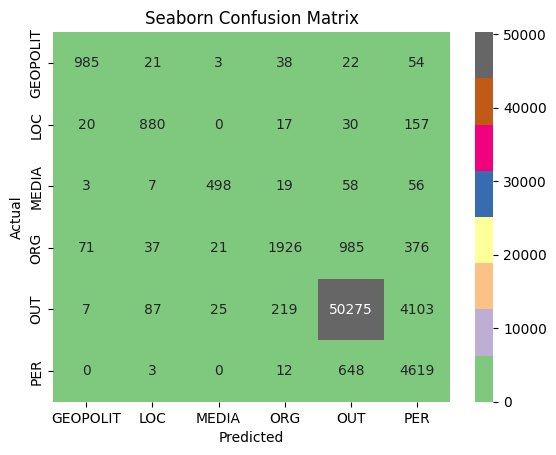

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(valid_y, preds)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Accent")

ax.set_title('Seaborn Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()

In [84]:
# Изменим векторайзер, добавив биграмы:

In [85]:
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    ngrams=(1, 2),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)
mmodel_bi = modelNER()
mmodel_bi.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

mmodel_bi.fit( train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
12428/12428 [==============================] - 164s 13ms/step - loss: 0.2932 - accuracy: 0.9148 - val_loss: 0.2100 - val_accuracy: 0.9380
Epoch 2/3
12428/12428 [==============================] - 109s 9ms/step - loss: 0.1238 - accuracy: 0.9631 - val_loss: 0.2260 - val_accuracy: 0.9402
Epoch 3/3
12428/12428 [==============================] - 98s 8ms/step - loss: 0.1089 - accuracy: 0.9660 - val_loss: 0.2129 - val_accuracy: 0.9402


2072/2072 [==============================] - 9s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1123
           1       0.84      0.79      0.82      1104
           2       0.91      0.78      0.84       641
           3       0.85      0.58      0.69      3416
           4       0.94      0.99      0.97     54716
           5       0.98      0.70      0.82      5282

    accuracy                           0.94     66282
   macro avg       0.91      0.79      0.84     66282
weighted avg       0.94      0.94      0.94     66282



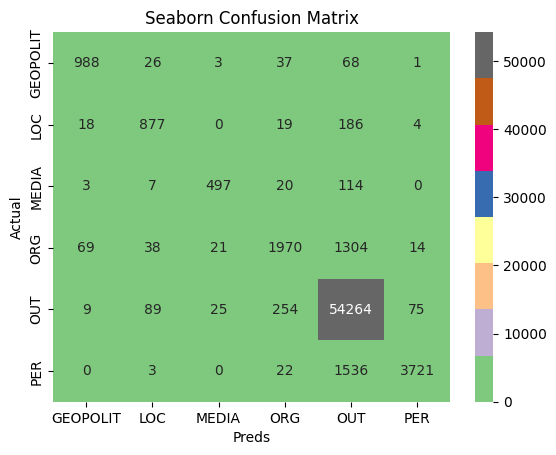

In [86]:
preds_bi = mmodel_bi.predict(valid_x)
preds_bi = np.argmax(preds_bi,axis=1)

print(classification_report(valid_y, preds_bi))

cm = confusion_matrix(valid_y, preds_bi)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Accent")

ax.set_title('Seaborn Confusion Matrix')
ax.set_xlabel('Preds')
ax.set_ylabel('Actual')

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()

In [90]:
# Изменим векторайзер, добавив биграмы и триграмы и длину последовательности 100:

In [88]:
seq_len = 100

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    ngrams=(1, 3),
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)
mmodel_three = modelNER()
mmodel_three.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

mmodel_three.fit( train_data, validation_data=valid_data, epochs=3)

Epoch 1/3
12428/12428 [==============================] - 115s 9ms/step - loss: 0.2944 - accuracy: 0.9146 - val_loss: 0.2124 - val_accuracy: 0.9378
Epoch 2/3
12428/12428 [==============================] - 100s 8ms/step - loss: 0.1260 - accuracy: 0.9622 - val_loss: 0.2390 - val_accuracy: 0.8925
Epoch 3/3
12428/12428 [==============================] - 105s 8ms/step - loss: 0.1094 - accuracy: 0.9656 - val_loss: 0.2212 - val_accuracy: 0.9399


2072/2072 [==============================] - 8s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1123
           1       0.85      0.78      0.81      1104
           2       0.91      0.77      0.84       641
           3       0.86      0.56      0.68      3416
           4       0.94      0.99      0.97     54716
           5       0.97      0.71      0.82      5282

    accuracy                           0.94     66282
   macro avg       0.90      0.78      0.83     66282
weighted avg       0.94      0.94      0.94     66282



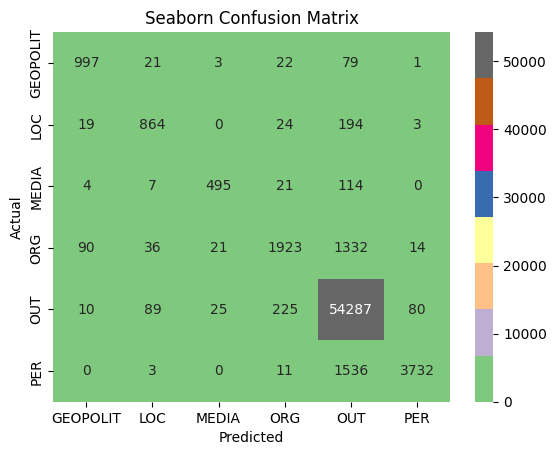

In [89]:
preds_three = mmodel_three.predict(valid_x)
preds_three = np.argmax(preds_three,axis=1)

print(classification_report(valid_y, preds_three))

cm = confusion_matrix(valid_y, preds_three)
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Accent")

ax.set_title('Seaborn Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])
ax.yaxis.set_ticklabels(['GEOPOLIT', 'LOC', 'MEDIA', 'ORG', 'OUT', 'PER'])

plt.show()

Результаты собственной NER достаточно неплохие.

Если подавать в нейросеть и токен, и соседей, результат получается лучше, по сравнению с тем, если подавать только токен.